(np.float64(-3.619355980285419),
 np.float64(2.889001810295937),
 np.float64(-3.555284137398266),
 np.float64(4.145787388113625))

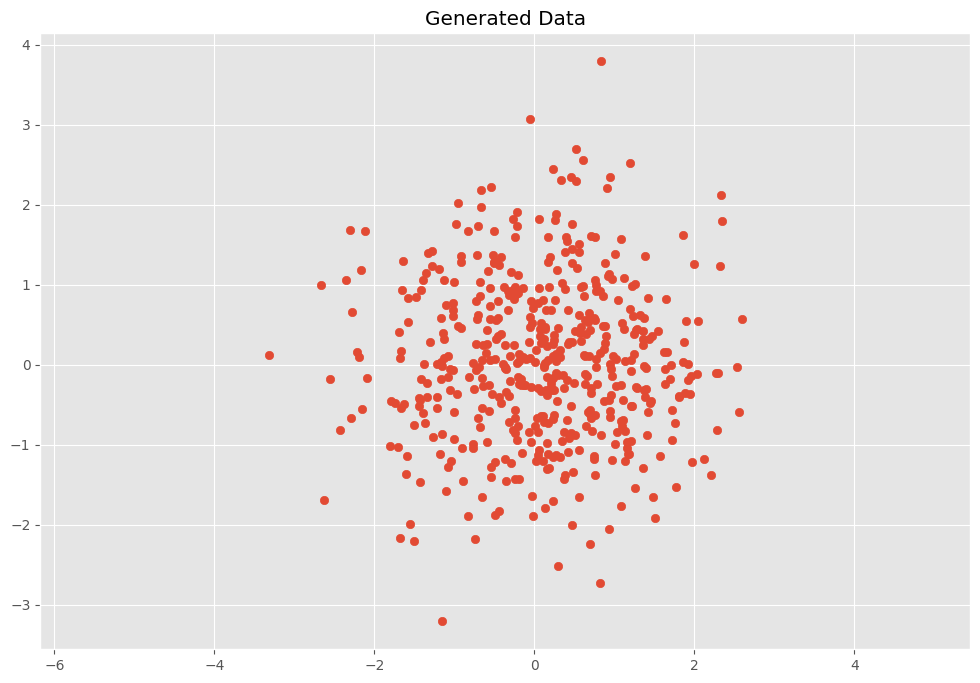

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 8)

# Normal distributed x and y vector with mean 0 and standard deviation 1
x = np.random.normal(0, 1, 500)
y = np.random.normal(0, 1, 500)
X = np.vstack((x, y)).T

plt.scatter(X[:, 0], X[:, 1])
plt.title('Generated Data')
plt.axis('equal')


In [19]:
def cov(x,y):
    x_bar,y_bar = x.mean(),y.mean()
    
    return np.sum((x - x_bar)*(y-y_bar)) / (len(x) - 1)

def cov_mat(X):
    return np.array([[cov(X[0],X[0]), cov(X[0],X[1])],\
                     [cov(X[1],X[0]),cov(X[1],X[1])]])

In [35]:
c = cov_mat(X.T)
c

array([[1.08626147, 0.00228265],
       [0.00228265, 1.01186147]])

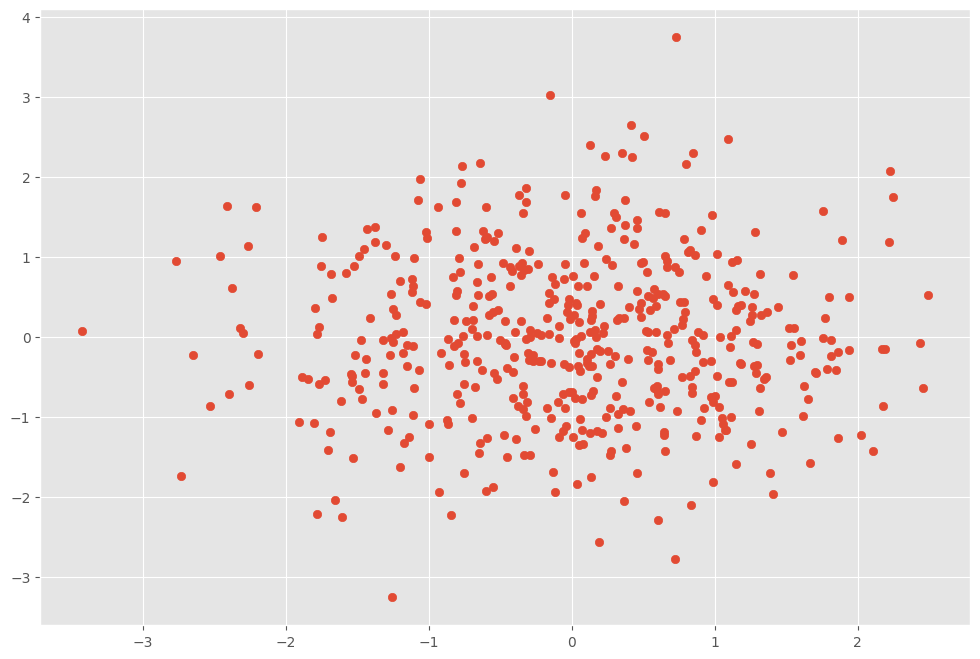

In [31]:
# Center the matrix at the origin
X = X - np.mean(X, 0)
plt.scatter(X[:,0],X[:,1])

In [36]:
S = np.sqrt(c,dtype=float)
S

array([[1.04223868, 0.04777708],
       [0.04777708, 1.00591325]])

array([[5.32268119e-01, 5.43270570e-03],
       [5.43270570e-03, 1.16971186e+01]])

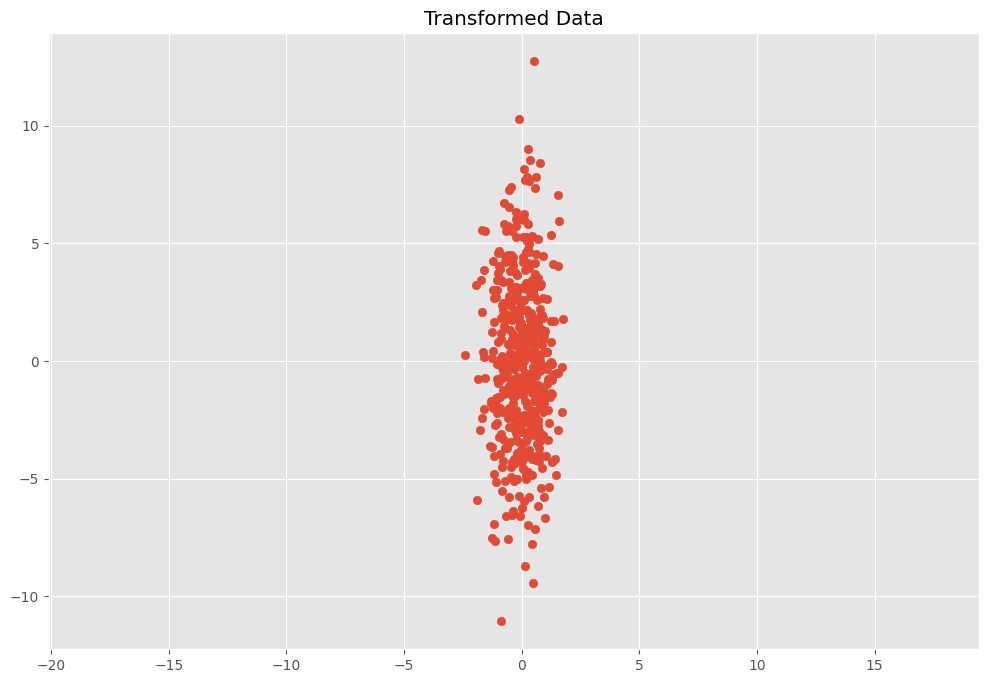

In [ ]:
# Center the matrix at the origin
X = X - np.mean(X, 0)

# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Apply scaling matrix to X
Y = X.dot(Scale)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal')

# Calculate covariance matrix
cov_mat(Y.T)

array([[ 5.40964007, -5.53772523],
       [-5.53772523,  6.81974661]])

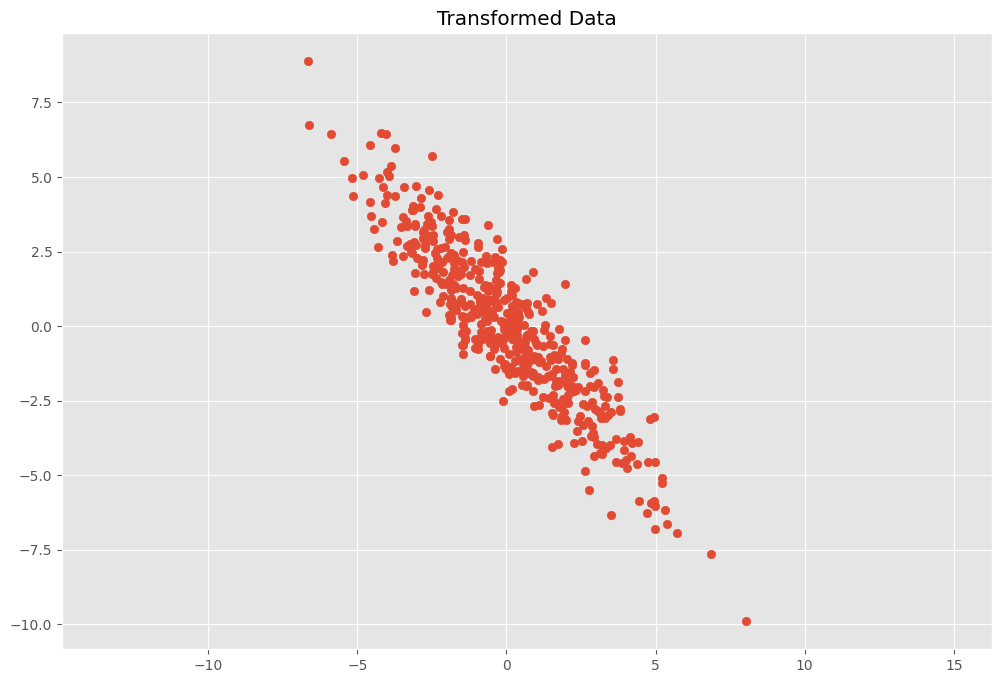

In [45]:
# Scaling matrix
sx, sy = 0.7, 3.4
Scale = np.array([[sx, 0], [0, sy]])

# Rotation matrix
theta = 0.77*np.pi
c, s = np.cos(theta), np.sin(theta)
Rot = np.array([[c, -s], [s, c]])

# Transformation matrix
T = Scale.dot(Rot)

# Apply transformation matrix to X
Y = X.dot(T)

plt.scatter(Y[:, 0], Y[:, 1])
plt.title('Transformed Data')
plt.axis('equal');

# Calculate covariance matrix
cov_mat(Y.T)

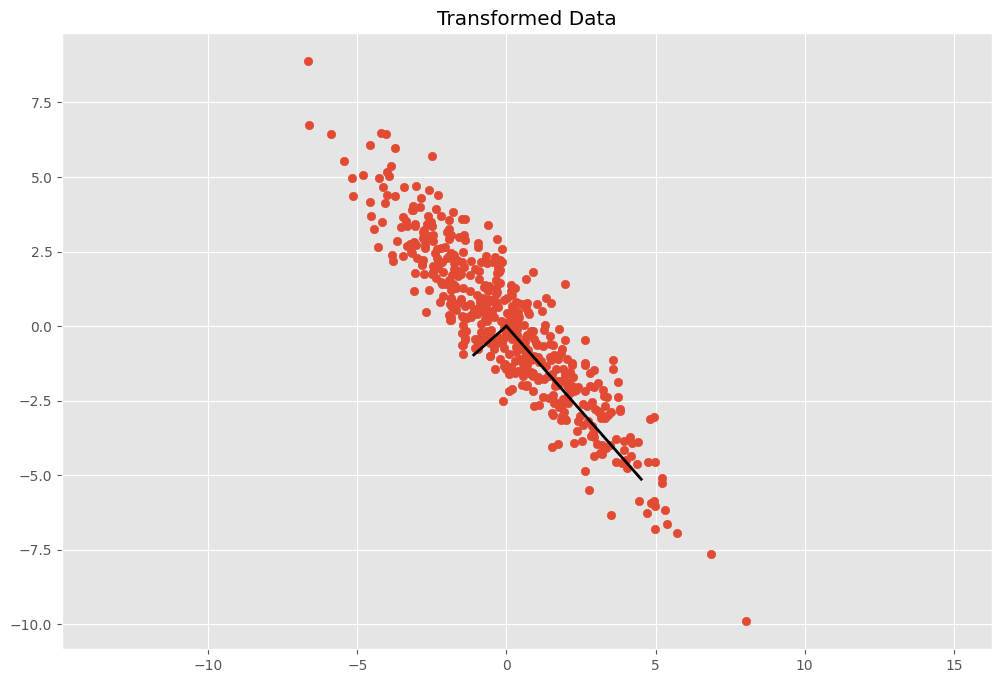

In [49]:
C = cov_mat(Y.T)
eVe, eVa = np.linalg.eig(C)

plt.scatter(Y[:, 0], Y[:, 1])
for e, v in zip(eVe, eVa.T):
    plt.plot([0, 2*np.sqrt(e)*v[0]], [0, 2*np.sqrt(e)*v[1]], 'k-', lw=2)
plt.title('Transformed Data')
plt.axis('equal');

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sympy as sp

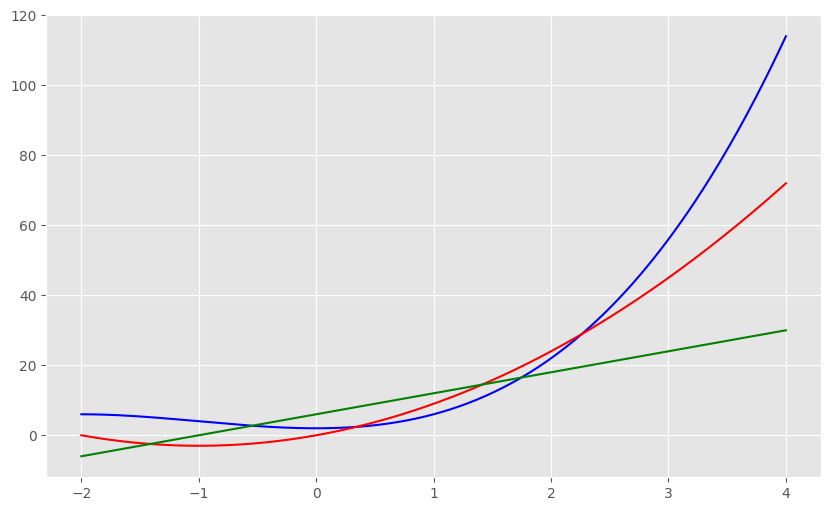

In [24]:
x = sp.symbols('x')

eq = x**3 + 3*x**2 + 2

deq = sp.diff(eq,x)

d2eq = sp.diff(deq)

f = sp.lambdify(x,eq,'numpy')
df = sp.lambdify(x,deq,'numpy')
dff = sp.lambdify(x,d2eq,'numpy')

x_vals = np.linspace(-2,4,400)
y_vals = f(x_vals)
y_f_vals = df(x_vals)
y_ff_vals = dff(x_vals)

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

plt.plot(x_vals,y_vals,label="f(x) = $x^3 - 3x^2 + 2$", color='blue')
plt.plot(x_vals,y_f_vals,label="f(x) = $3*x^2 - 6x $", color='red')
plt.plot(x_vals,y_ff_vals,label="f(x) = $6*x - 6 $", color='green')
plt.show()

In [26]:
critical_points = sp.solve(deq,x)
critical_points

[-2, 0]

In [27]:
for point in critical_points:
    second_deriv = d2eq.subs(x,point)
    if second_deriv > 0:
        print(f"Local minimum at x = {point}")
    elif second_deriv < 0:
        print(f"Local maximum at x = {point}")
    else:
        print(f"Inconclusive at x = {point}")

Local maximum at x = -2
Local minimum at x = 0


In [28]:
import sympy as sp

# Symbol and function
x = sp.symbols('x')
f_expr = x**3 - 3*x**2 + 2

# First and second derivatives
f_prime_expr = sp.diff(f_expr, x)
f_double_prime_expr = sp.diff(f_prime_expr, x)

# Find critical points
critical_points = sp.solve(f_prime_expr, x)
print("Critical points:", critical_points)

# Second derivative test
for point in critical_points:
    fpp = f_double_prime_expr.subs(x, point)
    if fpp > 0:
        print(f"Local minimum at x = {point}, value = {f_expr.subs(x, point)}")
    elif fpp < 0:
        print(f"Local maximum at x = {point}, value = {f_expr.subs(x, point)}")
    else:
        print(f"Inconclusive at x = {point}")

Critical points: [0, 2]
Local maximum at x = 0, value = 2
Local minimum at x = 2, value = -2


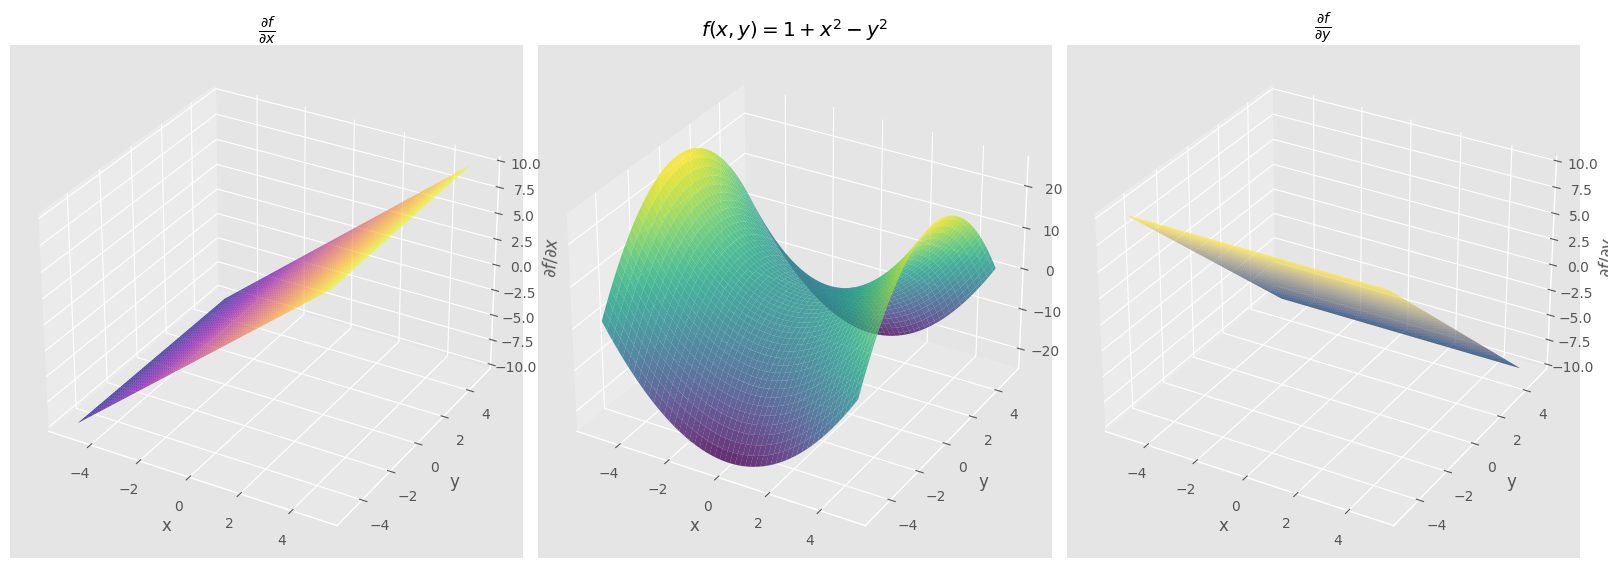

In [40]:
x,y = sp.symbols('x,y')

new_eq = 1 + x**2 - y**2

f = sp.lambdify((x,y),new_eq,'numpy')

x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)

Z = f(X, Y)

# Compute partial derivatives
df_dx = sp.diff(new_eq, x)
df_dy = sp.diff(new_eq, y)

# Lambdify the derivatives
df_dx_func = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_func = sp.lambdify((x, y), df_dy, 'numpy')

dz_dx = df_dx_func(X, Y)
dz_dy = df_dy_func(X, Y)

fig = plt.figure(figsize=(16, 7))

# Plot original function
ax1 = fig.add_subplot(1, 3, 2, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title(r"$f(x, y) = 1 + x^2 - y^2$")
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# Plot ∂f/∂x
ax2 = fig.add_subplot(1, 3, 1, projection='3d')
ax2.plot_surface(X, Y, dz_dx, cmap='plasma', alpha=0.8)
ax2.set_title(r"$\frac{\partial f}{\partial x}$")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel(r'$\partial f/\partial x$')

# Plot ∂f/∂y
ax3 = fig.add_subplot(1, 3, 3, projection='3d')
ax3.plot_surface(X, Y, dz_dy, cmap='cividis', alpha=0.8)
ax3.set_title(r"$\frac{\partial f}{\partial y}$")
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel(r'$\partial f/\partial y$')

plt.tight_layout()
plt.show()


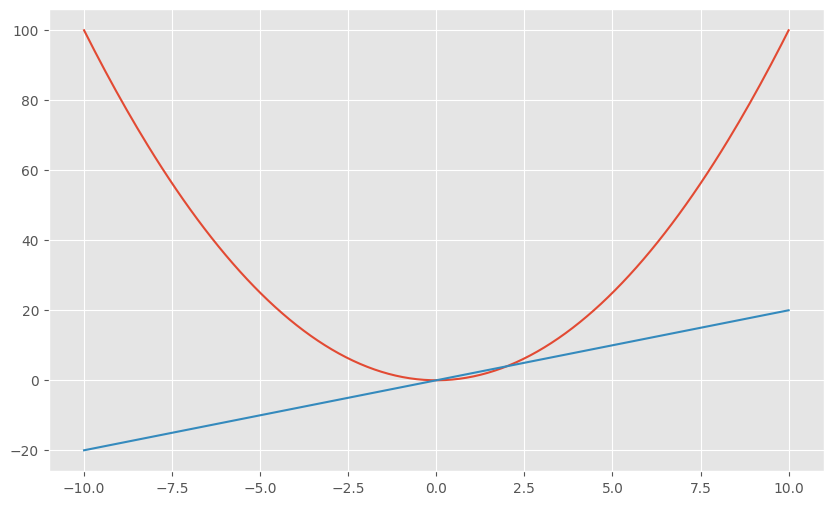

In [55]:
x = sp.symbols('x')
eq = x**2
deq  = sp.diff(eq, x)

f = sp.lambdify(x, eq, 'numpy')
l_deq = sp.lambdify(x, deq, 'numpy')

x_num = np.linspace(-10, 10, 200)
y = f(x_num)
dy = l_deq(x_num)

plt.plot(x_num, y)
plt.plot(x_num, dy)

Gradient: [2*x + 2*y, 2*x + 2*y]
Hessian Matrix:
⎡2  2⎤
⎢    ⎥
⎣2  2⎦


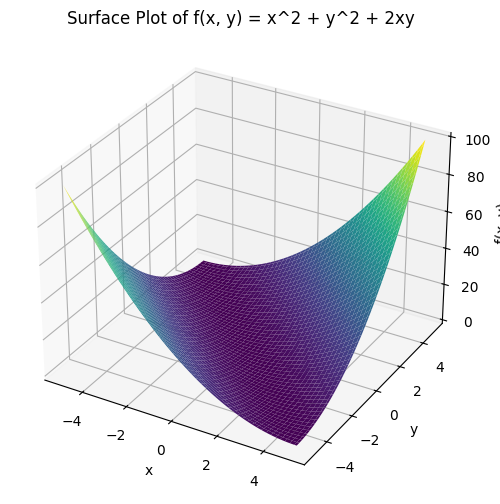

In [30]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Define symbols and function
x, y = sp.symbols('x y')
f = x**2 + y**2 + 2*x*y

# Step 2: First-order derivatives (Gradient)
grad_f = [sp.diff(f, var) for var in (x, y)]
print("Gradient:", grad_f)

# Step 3: Second-order derivatives (Hessian matrix)
hessian_f = sp.hessian(f, (x, y))
print("Hessian Matrix:")
sp.pprint(hessian_f)

# Step 4: Convert sympy function to numpy function for plotting
f_lambdified = sp.lambdify((x, y), f, modules='numpy')

# Step 5: Plotting the surface
x_vals = np.linspace(-5, 5, 100)
y_vals = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_lambdified(X, Y)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title('Surface Plot of f(x, y) = x^2 + y^2 + 2xy')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

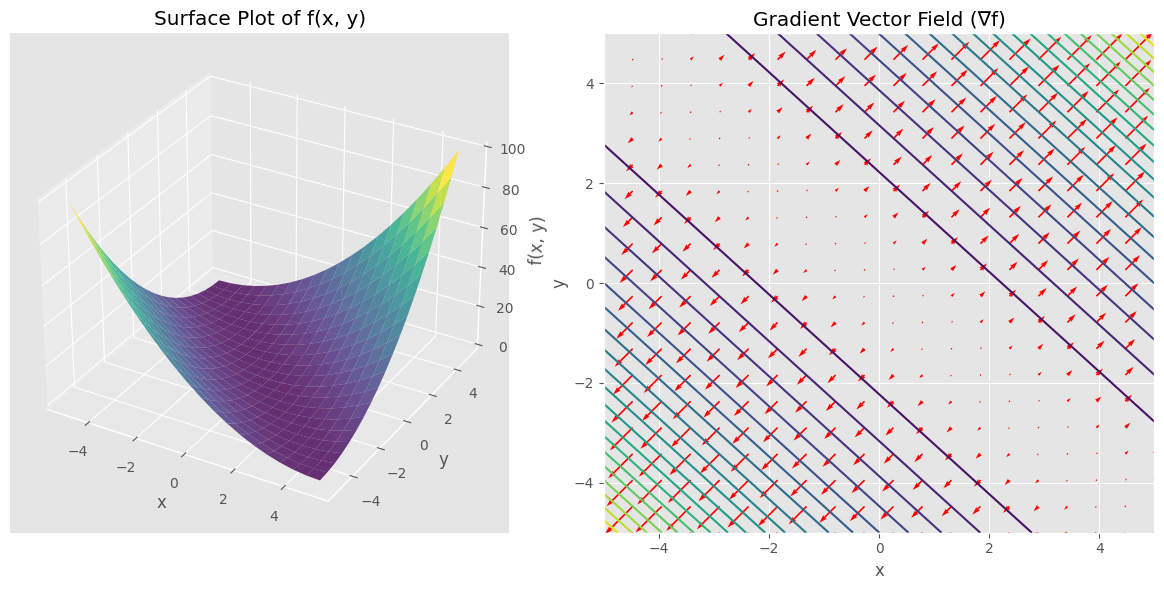

In [57]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define symbolic variables and function
x, y = sp.symbols('x y')
f = x**2 + y**2 + 2*x*y

# Step 2: First-order partial derivatives (gradient components)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

# Lambdify function and its gradient components
f_func = sp.lambdify((x, y), f, 'numpy')
df_dx_func = sp.lambdify((x, y), df_dx, 'numpy')
df_dy_func = sp.lambdify((x, y), df_dy, 'numpy')

# Step 3: Create grid
x_vals = np.linspace(-5, 5, 20)
y_vals = np.linspace(-5, 5, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Evaluate function and gradient on the grid
Z = f_func(X, Y)
U = df_dx_func(X, Y)
V = df_dy_func(X, Y)

# Step 4: Plot surface and gradient vectors
fig = plt.figure(figsize=(12, 6))

# Surface plot
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_title('Surface Plot of f(x, y)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')

# Gradient vector field (Quiver plot)
ax2 = fig.add_subplot(1, 2, 2)
contours = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.quiver(X, Y, U, V, color='red')
ax2.set_title('Gradient Vector Field (∇f)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
%matplotlib inline

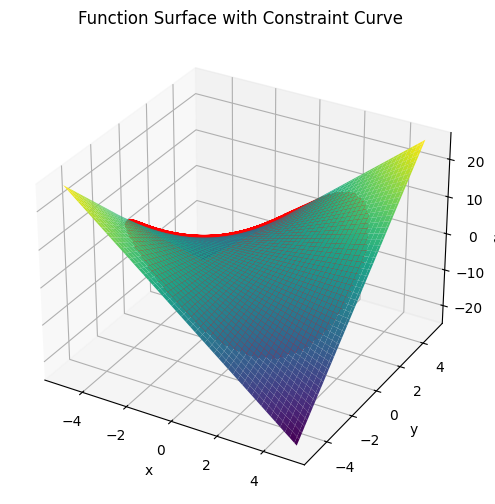

In [ ]:
x_sym, y_sym = sp.symbols('x y')

# function
eq = x_sym * y_sym + 1

f = sp.lambdify((x_sym, y_sym), eq)


Z = f(X, Y)

# constraint
const = x_sym**2 + y_sym**2 - 1
c = sp.lambdify((x_sym, y_sym), const, 'numpy')
cz = c(X, Y)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

constraint_mask = np.isclose(cz, 0, atol=20)  \
ax.plot3D(X[constraint_mask], Y[constraint_mask], Z[constraint_mask], color='red', linewidth=4)

ax.set_title('Function Surface with Constraint Curve')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()


In [42]:
df_x = sp.diff(eq,x_sym)
df_y = sp.diff(eq,y_sym)

grad_f = [df_x,df_y]

dx_cons = sp.diff(const,x_sym)
dy_cons = sp.diff(const,y_sym)

grad_g = [dx_cons,dy_cons]



In [43]:
t = sp.symbols('t')

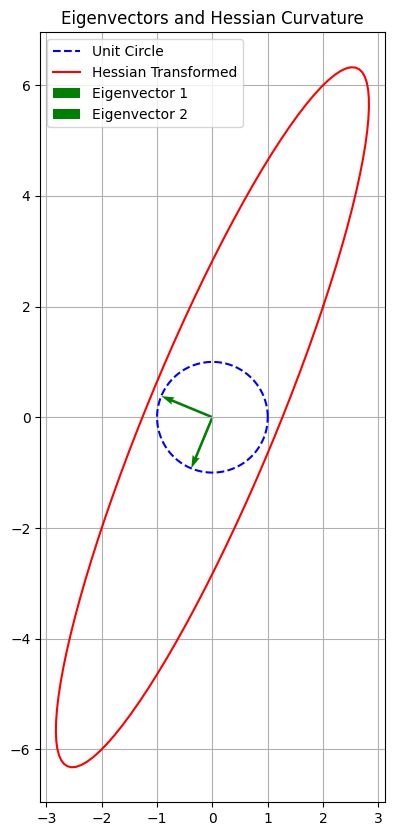

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, hessian, lambdify

# Define symbolic variables
x, y = symbols('x y')

# Define a 2-variable function
f = x**2 + 3*y**2 + 2*x*y

# Compute Hessian matrix
H = hessian(f, (x, y))

# Convert Hessian to a numerical function
H_func = lambdify((x, y), H, 'numpy')

# Evaluate the Hessian at a point (x0, y0)
x0, y0 = 0, 0
H_eval = np.array(H_func(x0, y0))

# Eigen decomposition of the Hessian
eigvals, eigvecs = np.linalg.eig(H_eval)

# Plot the eigenvectors and function curvature
fig, ax = plt.subplots(figsize=(16,10))

# Draw unit circle
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.array([np.cos(theta), np.sin(theta)])

# Transform circle by Hessian to visualize curvature
ellipse = H_eval @ circle

ax.plot(circle[0], circle[1], 'b--', label='Unit Circle')
ax.plot(ellipse[0], ellipse[1], 'r-', label='Hessian Transformed')

# Plot eigenvectors
origin = np.zeros(2)
for i in range(2):
    ax.quiver(*origin, *eigvecs[:, i], angles='xy', scale_units='xy', scale=1, color='g', label=f'Eigenvector {i+1}')

ax.set_aspect('equal')
ax.set_title('Eigenvectors and Hessian Curvature')
ax.legend()
plt.grid(True)
plt.show()

Gradient at point [1. 2.] = [3.16770633 0.58385316]
Unit direction = [0.89442719 0.4472136 ]
Directional derivative = 3.094389744358717


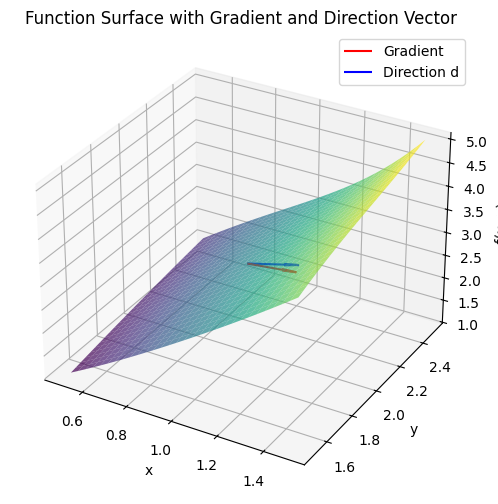

In [ ]:
# import sympy as sp
# import numpy as np
# import matplotlib.pyplot as plt

# # Step 1: Define symbolic variables and function
# x, y = sp.symbols('x y')
# f = x**2 * y + sp.sin(x*y)

# # Step 2: Compute the gradient
# grad_f = [sp.diff(f, var) for var in (x, y)]

# # Step 3: Choose a point and direction
# point = np.array([1.0, 2.0])
# direction = np.array([2, 1])
# unit_direction = direction / np.linalg.norm(direction)

# # Step 4: Lambdify the gradient for numerical evaluation
# grad_f_func = [sp.lambdify((x, y), grad_i, 'numpy') for grad_i in grad_f]
# grad_at_point = np.array([g(*point) for g in grad_f_func])

# # Step 5: Compute directional derivative as dot product
# dir_derivative = np.dot(grad_at_point, unit_direction)

# print(f"Gradient at point {point} = {grad_at_point}")
# print(f"Unit direction = {unit_direction}")
# print(f"Directional derivative = {dir_derivative}")

# # Step 6: Plot the function and gradient arrow
# X_vals = np.linspace(0.5, 1.5, 30)
# Y_vals = np.linspace(1.5, 2.5, 30)
# X, Y = np.meshgrid(X_vals, Y_vals)
# f_func = sp.lambdify((x, y), f, 'numpy')
# Z = f_func(X, Y)

# fig = plt.figure(figsize=(20, 6))

# ax = fig.add_subplot(1,2,1,projection='3d')

# # Plot the surface
# ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

# # Plot the gradient vector at the point (as an arrow)
# ax.quiver(point[0], point[1], f_func(point[0], point[1]),
# 		  grad_at_point[0], grad_at_point[1], 0,
# 		  color='r', length=0.2, normalize=True, label='Gradient')

# # Plot the direction vector at the point (as an arrow)
# ax.quiver(point[0], point[1], f_func(point[0], point[1]),
# 		  unit_direction[0], unit_direction[1], 0,
# 		  color='b', length=0.2, normalize=True, label='Direction d')

# ax.set_title("Function Surface with Gradient and Direction Vector")
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('f(x, y)')
# ax.legend()
# plt.show()

In [64]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define symbolic variables and function
x, y = sp.symbols('x y')
f =  2 - x**2 - y**2

df = [sp.diff(f,var) for var in (x,y)]

lamb_f = sp.lambdify((x,y),f,'numpy')

lamb_df = [sp.lambdify((x,y),func,'numpy') for func in df]

point = np.array([1/2, -1/2])
direction = np.array([1/(2**1/2), 1/(2**1/2)])
unit_direction = direction / np.linalg.norm(direction)

lamb_at_point = [apply(*point) for apply in lamb_df]

dir_derivative = np.dot(lamb_at_point,unit_direction)



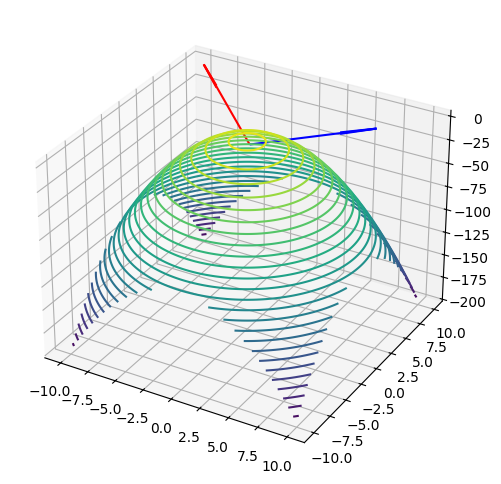

In [72]:
X_val = np.linspace(-10,10,100)
Y_val = np.linspace(-10,10,100)
X,Y = np.meshgrid(X_val,Y_val)
Z = lamb_f(X,Y)

fig = plt.figure(figsize=(14,6))


ax = fig.add_subplot(1,2,1,projection='3d')
contours = plt.contour(X, Y, Z, levels=30, cmap='viridis')

# Plot the gradient vector at the point (as an arrow)
ax.quiver(point[0], point[1], lamb_f(point[0], point[1]),
          lamb_at_point[0], lamb_at_point[1], 0,
          color='r', length=10, label='Gradient')

# Plot the direction vector at the point (as an arrow)
ax.quiver(point[0], point[1], lamb_f(point[0], point[1]),
          unit_direction[0], unit_direction[1], 0,
          color='b', length=10, label='Direction d')

# Plot the directional derivative at the point (as an arrow)
ax.quiver(point[0], point[1], lamb_f(point[0], point[1]),
          dir_derivative * unit_direction[0], dir_derivative * unit_direction[1], 0,
          color='y', length=10, label='Directional Derivative')

# ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

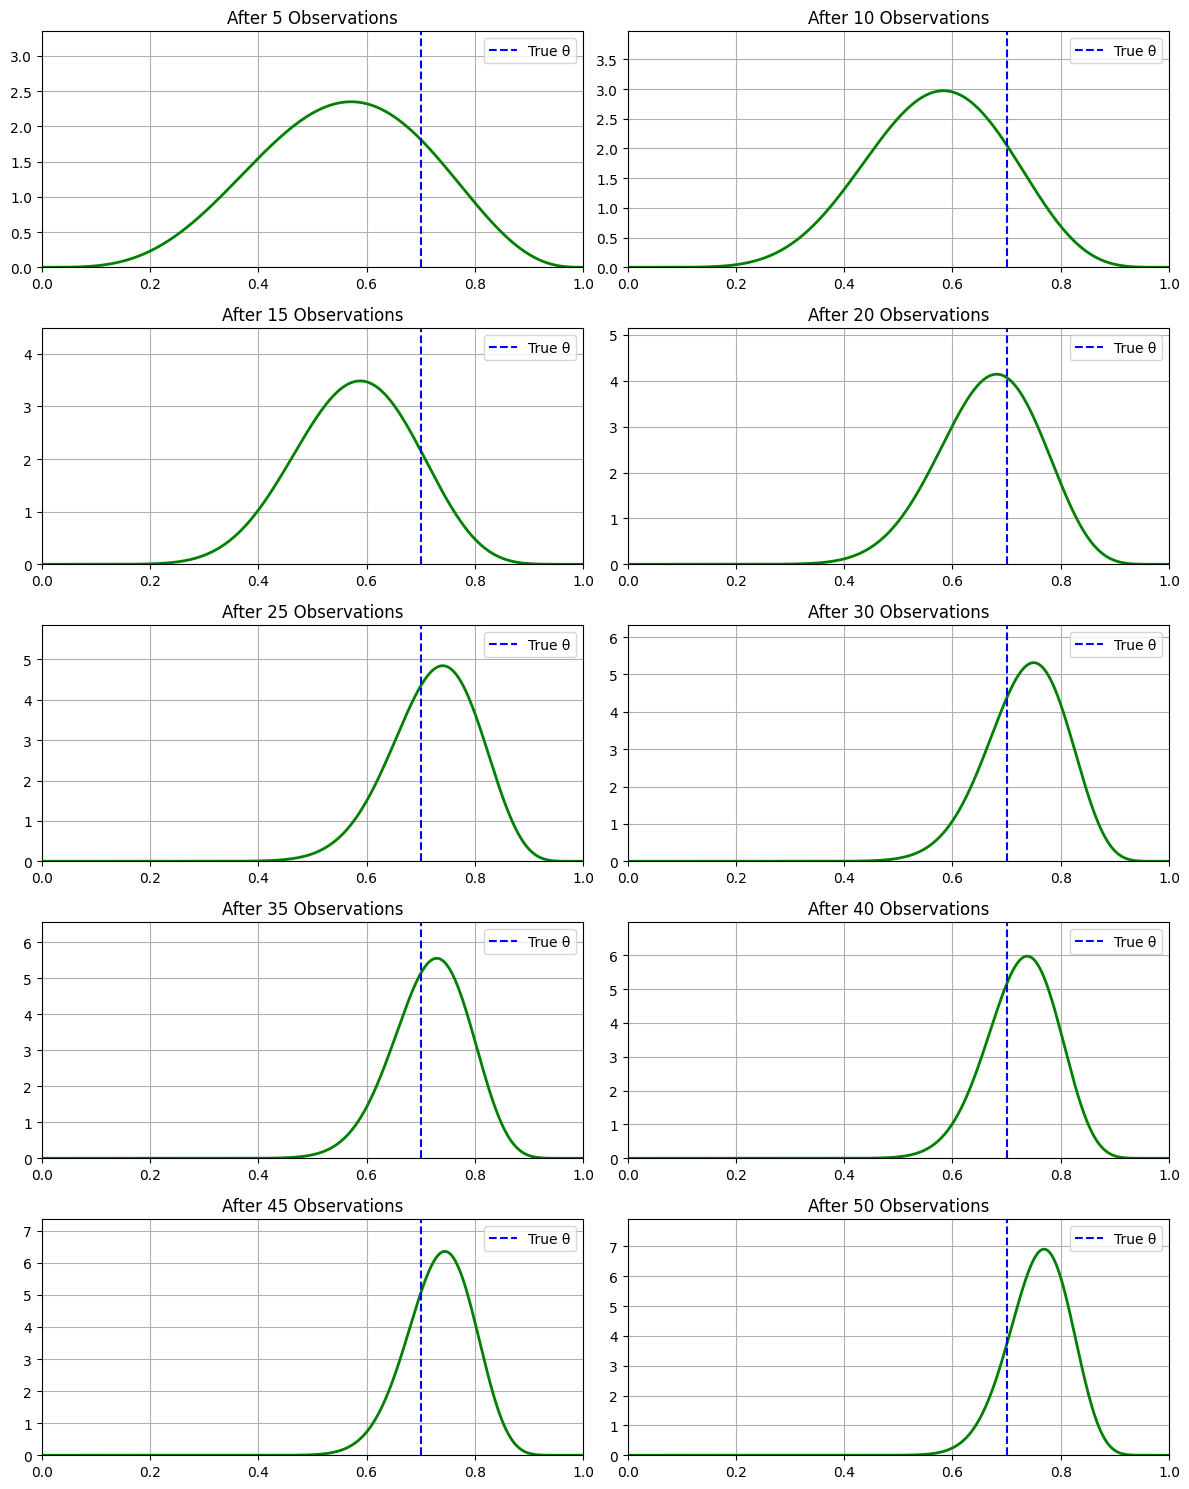

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta


np.random.seed(42)
true_theta = 0.7
n_trials = 50
observations = np.random.binomial(1, true_theta, n_trials)


a_prior = 2
b_prior = 2


theta = np.linspace(0, 1, 500)


posteriors = []
a_post, b_post = a_prior, b_prior


for i in range(1, n_trials + 1):
    data = observations[:i]
    n_heads = np.sum(data)
    n_tails = i - n_heads
    a_post = a_prior + n_heads
    b_post = b_prior + n_tails
    posteriors.append((i, beta.pdf(theta, a_post, b_post)))


fig, axes = plt.subplots(5, 2, figsize=(12, 15))
axes = axes.flatten()

for idx, ax in enumerate(axes):
    step = (idx + 1) * 5
    n, pdf_vals = posteriors[step - 1]
    ax.plot(theta, pdf_vals, color='green', lw=2)
    ax.axvline(true_theta, color='blue', linestyle='--', label='True θ')
    ax.set_title(f'After {n} Observations')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, np.max(pdf_vals) + 1)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [2]:
np.random.seed(42)
true_theta = 0.7
n_trials = 50
observations = np.random.binomial(1, true_theta, n_trials)
observations

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1])